In [27]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from keras.layers import Dense , Dropout , BatchNormalization , Conv2D , MaxPooling2D , Flatten 
from keras.models import Sequential
from tensorflow.keras.callbacks import EarlyStopping , ReduceLROnPlateau

In [19]:
train_dir = r"C:\datasets\dogs_vs_cats\train"

In [20]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2 
)

In [21]:
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(128, 128),
    batch_size=32,
    class_mode='binary',
    subset='training'
)

Found 16000 images belonging to 2 classes.


In [22]:
validation_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(128, 128),
    batch_size=32,
    class_mode='binary',
    subset='validation'
)

Found 4000 images belonging to 2 classes.


In [25]:
cnn = Sequential()
cnn.add(Conv2D(32 , (3,3) , activation = 'relu' , input_shape = (128,128,3)))
cnn.add(BatchNormalization())
cnn.add(MaxPooling2D(2,2))

cnn.add(Conv2D(64 , (3,3) , activation = 'relu'))
cnn.add(BatchNormalization())
cnn.add(MaxPooling2D(2,2))

cnn.add(Conv2D(128 , (3,3) , activation = 'relu'))
cnn.add(BatchNormalization())
cnn.add(MaxPooling2D(2,2))

cnn.add(Flatten())

cnn.add(Dense(256 , activation = 'relu'))
cnn.add(Dropout(0.5))

cnn.add(Dense(1 , activation = 'sigmoid'))

c:\Users\HomePC\Desktop\macine learing\projects of dl\project 1\.venv\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [26]:
cnn.compile(loss = 'binary_crossentropy' , metrics = ['accuracy'] , optimizer = 'adam')

In [28]:
early_stop = EarlyStopping(monitor = 'val_loss' , patience = 5 , restore_best_weights = True)
reduce_lr = ReduceLROnPlateau(monitor = 'val_loss' , patience = 3 , factor = 0.2 , min_lr = 1e-6)

In [30]:
history = cnn.fit(train_generator , epochs = 25 , validation_data = validation_generator , callbacks = [early_stop , reduce_lr])

c:\Users\HomePC\Desktop\macine learing\projects of dl\project 1\.venv\lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/25
500/500 ━━━━━━━━━━━━━━━━━━━━ 2329s 5s/step - accuracy: 0.5991 - loss: 1.6459 - val_accuracy: 0.6250 - val_loss: 0.6647 - learning_rate: 0.0010
Epoch 2/25
500/500 ━━━━━━━━━━━━━━━━━━━━ 1060s 2s/step - accuracy: 0.7304 - loss: 0.5448 - val_accuracy: 0.7605 - val_loss: 0.5007 - learning_rate: 0.0010
Epoch 3/25
500/500 ━━━━━━━━━━━━━━━━━━━━ 1251s 3s/step - accuracy: 0.7879 - loss: 0.4574 - val_accuracy: 0.7820 - val_loss: 0.4557 - learning_rate: 0.0010
Epoch 4/25
500/500 ━━━━━━━━━━━━━━━━━━━━ 165s 330ms/step - accuracy: 0.8297 - loss: 0.3905 - val_accuracy: 0.7555 - val_loss: 0.5223 - learning_rate: 0.0010
Epoch 5/25
500/500 ━━━━━━━━━━━━━━━━━━━━ 165s 330ms/step - accuracy: 0.8422 - loss: 0.3601 - val_accuracy: 0.8008 - val_loss: 0.4370 - learning_rate: 0.0010
Epoch 6/25
500/500 ━━━━━━━━━━━━━━━━━━━━ 165s 331ms/step - accuracy: 0.8817 - loss: 0.2906 - val_accuracy: 0.7153 - val_loss: 0.6316 - learning_rate: 0.0010
Epoch 7/25
500/500 ━━━━━━━━━━━━━━━━━━━━ 165s 331ms/step - accuracy: 0.

In [32]:
cnn.save("dog_vs_cat_cnn_model.h5")

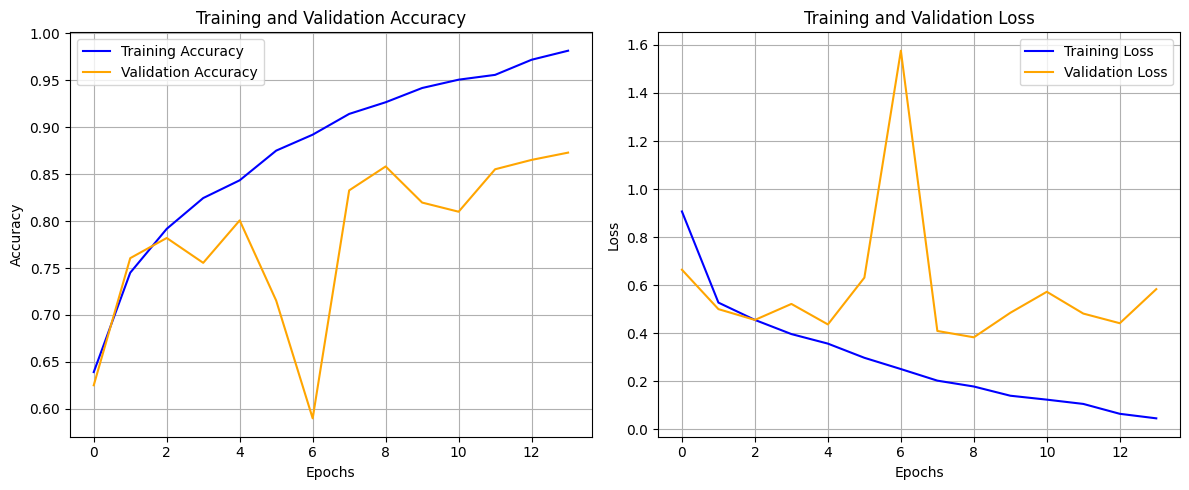

In [ ]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy', color='blue')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', color='orange')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss', color='blue')
plt.plot(history.history['val_loss'], label='Validation Loss', color='orange')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()